### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(['EIN', 'NAME'],1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count=application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

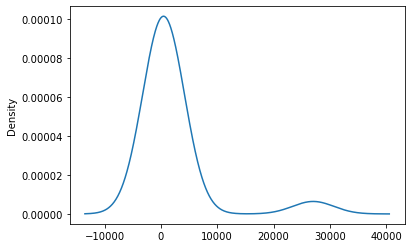

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application=list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_count=application_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1900        1
C1580        1
C6100        1
C2150        1
C5200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

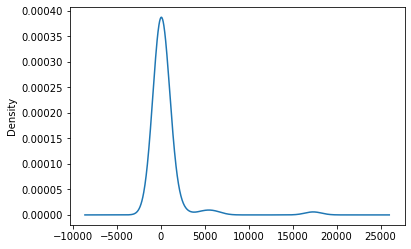

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class=list(classification_count[classification_count < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5898 - accuracy: 0.7081
Epoch 2/100
190/804 [======>.......................] - ETA: 2s - loss: 0.5527 - accuracy: 0.7363
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5542 - accuracy: 0.7330
Epoch 3/100
382/804 [=============>................] - ETA: 0s - loss: 0.5510 - accuracy: 0.7317
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5524 - accuracy: 0.7307: 0s - loss: 0
Epoch 4/100
581/804 [====================>.........] - ETA: 0s - loss: 0.5535 - accuracy: 0.7312
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5527 - accuracy: 0.7318: 0s - loss: 0.553
Epoch 5/100
775/804 [===========================>..] - ETA: 0s - loss: 0.5436 - accuracy: 0.7366
Epoch 00005: saving model to checkpoints\

442/804 [===============>..............] - ETA: 0s - loss: 0.5420 - accuracy: 0.7375
Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.7385
Epoch 40/100
618/804 [======================>.......] - ETA: 0s - loss: 0.5416 - accuracy: 0.7381
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5410 - accuracy: 0.7386
Epoch 41/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5439 - accuracy: 0.7311
Epoch 42/100
 32/804 [>.............................] - ETA: 3s - loss: 0.5334 - accuracy: 0.7503
Epoch 00042: saving model to checkpoints\weights.42.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5388 - accuracy: 0.7377
Epoch 43/100
214/804 [======>.......................] - ETA: 2s - loss: 0.5270 - accuracy: 0.7504 ETA: 4s - loss: 0.5186 
Epoch 00043: saving model to checkpoints\weights.43.hdf5


699/804 [=========================>....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7376
Epoch 00076: saving model to checkpoints\weights.76.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5399 - accuracy: 0.7378
Epoch 77/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5356 - accuracy: 0.7403: 0s - loss: 0.5355 - accuracy: 
Epoch 78/100
 75/804 [=>............................] - ETA: 3s - loss: 0.5471 - accuracy: 0.7344
Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5369 - accuracy: 0.7417: 1s
Epoch 79/100
272/804 [=========>....................] - ETA: 1s - loss: 0.5236 - accuracy: 0.7476
Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5324 - accuracy: 0.7422
Epoch 80/100
479/804 [================>.............] - ETA: 1s - loss: 0.5217 - accuracy: 0.7537
Epoch 00080: saving model to checkpoints\weig

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5562 - accuracy: 0.7266
Loss: 0.5562383532524109, Accuracy: 0.7266472578048706


In [21]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

### Optimizing ANN

In [22]:
#1st attempt - processing data, Status and Special Consideration are dichotomous data. 
#After encoding we can remove a column for Special Cosnideration
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL","SPECIAL_CONSIDERATIONS_Y"],1).values

# Split the preprocessed data into a training and testing dataset
X_train_op, X_test_op, y_train_op, y_test_op = train_test_split(X, y, random_state=78)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_op = scaler.fit(X_train_op)

# Scale the data
X_train_scaled_op = X_scaler_op.transform(X_train_op)
X_test_scaled_op = X_scaler_op.transform(X_test_op)

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_op[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3440      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model
fit_model = nn_1.fit(X_train_scaled_op,y_train_op,epochs=100)

Epoch 1/100
804/804 [==============================] - 5s 5ms/step - loss: 0.6260 - accuracy: 0.6585
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5682 - accuracy: 0.7296
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5712 - accuracy: 0.7247
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5630 - accuracy: 0.7286
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5601 - accuracy: 0.7279
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5538 - accuracy: 0.7346: 1s - loss:
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5560 - accuracy: 0.7290
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5491 - accuracy: 0.7342
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5504 - accuracy: 0.7322
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5

804/804 [==============================] - 4s 5ms/step - loss: 0.5390 - accuracy: 0.7384
Epoch 81/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5356 - accuracy: 0.7444
Epoch 82/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5433 - accuracy: 0.7364
Epoch 83/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5359 - accuracy: 0.7419
Epoch 84/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5380 - accuracy: 0.7374
Epoch 85/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5358 - accuracy: 0.7405
Epoch 86/100
804/804 [==============================] - 4s 6ms/step - loss: 0.5365 - accuracy: 0.7381
Epoch 87/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5382 - accuracy: 0.7386
Epoch 88/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5357 - accuracy: 0.7421
Epoch 89/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5365 - accuracy: 

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled_op,y_test_op,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5540 - accuracy: 0.7266
Loss: 0.5539796948432922, Accuracy: 0.7266472578048706


In [28]:
#2nd attempt - increase number of hidden nodes in both layers
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_op[0])
hidden_nodes_layer1 =  len(X_train_op[0])*2
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [29]:
# Check the structure of the model
nn_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 84)                3612      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 6,483
Trainable params: 6,483
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Train the model
fit_model = nn_2.fit(X_train_scaled_op,y_train_op,epochs=60)

Epoch 1/60
804/804 [==============================] - 5s 4ms/step - loss: 0.6390 - accuracy: 0.6443
Epoch 2/60
804/804 [==============================] - 5s 6ms/step - loss: 0.5708 - accuracy: 0.7257
Epoch 3/60
804/804 [==============================] - 5s 6ms/step - loss: 0.5643 - accuracy: 0.7292
Epoch 4/60
804/804 [==============================] - 5s 6ms/step - loss: 0.5576 - accuracy: 0.7325
Epoch 5/60
804/804 [==============================] - 4s 5ms/step - loss: 0.5610 - accuracy: 0.7296
Epoch 6/60
804/804 [==============================] - 4s 5ms/step - loss: 0.5586 - accuracy: 0.7263
Epoch 7/60
804/804 [==============================] - 4s 6ms/step - loss: 0.5542 - accuracy: 0.7338
Epoch 8/60
804/804 [==============================] - 3s 4ms/step - loss: 0.5476 - accuracy: 0.7347
Epoch 9/60
804/804 [==============================] - 5s 6ms/step - loss: 0.5529 - accuracy: 0.7344
Epoch 10/60
804/804 [==============================] - 4s 4ms/step - loss: 0.5536 - accuracy: 0.7310

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled_op,y_test_op,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5532 - accuracy: 0.7278
Loss: 0.5532340407371521, Accuracy: 0.7278134226799011


In [33]:
# 3rd attempt - Analyzing Ask amount it canbe seen that the standard deviation is too high
application_df['ASK_AMT'].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

<AxesSubplot:>

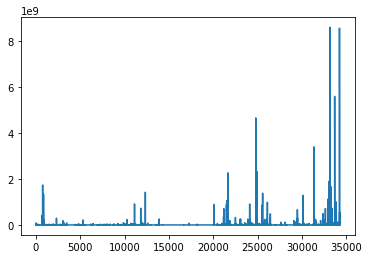

In [34]:
#boxplot = application_df.boxplot(column=['ASK_AMT'])
application_df['ASK_AMT'].plot()

<AxesSubplot:ylabel='Density'>

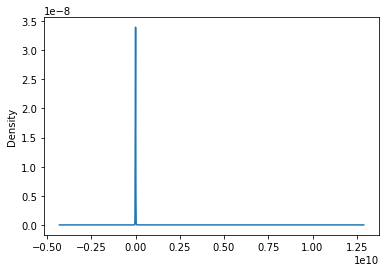

In [35]:
application_df['ASK_AMT'].plot.density()

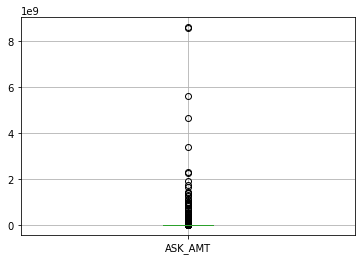

In [36]:
boxplot = application_df.boxplot(column=['ASK_AMT'])

In [37]:
df = application_df.drop(application_df[application_df.ASK_AMT > 110000].index) 

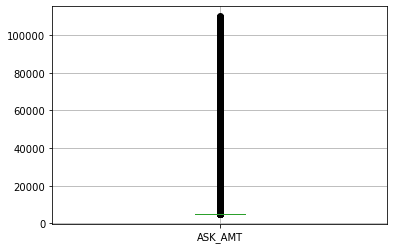

In [38]:
boxplot = df.boxplot(column=['ASK_AMT'])

In [39]:
df['ASK_AMT'].describe()

count     29943.000000
mean      10598.711786
std       17333.310490
min        5000.000000
25%        5000.000000
50%        5000.000000
75%        5000.000000
max      109978.000000
Name: ASK_AMT, dtype: float64

In [40]:
y = df["IS_SUCCESSFUL"].values
X = df.drop(["IS_SUCCESSFUL","SPECIAL_CONSIDERATIONS_Y"],1).values

# Split the preprocessed data into a training and testing dataset
X_train_opdf, X_test_opdf, y_train_opdf, y_test_opdf = train_test_split(X, y, random_state=78)

In [41]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_opdf = scaler.fit(X_train_opdf)

# Scale the data
X_train_scaled_opdf = X_scaler_opdf.transform(X_train_opdf)
X_test_scaled_opdf = X_scaler_opdf.transform(X_test_opdf)

In [42]:
#Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_opdf[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 80)                3440      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# Train the model
fit_model = nn_3.fit(X_train_scaled_opdf,y_train_opdf,epochs=100)

Epoch 1/100
702/702 [==============================] - 3s 4ms/step - loss: 0.5256 - accuracy: 0.7500
Epoch 2/100
702/702 [==============================] - 3s 4ms/step - loss: 0.5258 - accuracy: 0.7507
Epoch 3/100
702/702 [==============================] - 4s 5ms/step - loss: 0.5255 - accuracy: 0.7508
Epoch 4/100
702/702 [==============================] - 4s 5ms/step - loss: 0.5253 - accuracy: 0.7498
Epoch 5/100
702/702 [==============================] - 4s 6ms/step - loss: 0.5251 - accuracy: 0.7511
Epoch 6/100
702/702 [==============================] - 4s 6ms/step - loss: 0.5250 - accuracy: 0.7503
Epoch 7/100
702/702 [==============================] - 4s 5ms/step - loss: 0.5243 - accuracy: 0.7514
Epoch 8/100
702/702 [==============================] - 4s 5ms/step - loss: 0.5251 - accuracy: 0.7513
Epoch 9/100
702/702 [==============================] - 4s 5ms/step - loss: 0.5242 - accuracy: 0.7506
Epoch 10/100
702/702 [==============================] - 4s 6ms/step - loss: 0.5245 - accura

702/702 [==============================] - 2s 4ms/step - loss: 0.5173 - accuracy: 0.7551
Epoch 81/100
702/702 [==============================] - 2s 3ms/step - loss: 0.5170 - accuracy: 0.7554
Epoch 82/100
702/702 [==============================] - 2s 3ms/step - loss: 0.5171 - accuracy: 0.7541
Epoch 83/100
702/702 [==============================] - 2s 3ms/step - loss: 0.5172 - accuracy: 0.7550
Epoch 84/100
702/702 [==============================] - 2s 3ms/step - loss: 0.5166 - accuracy: 0.7544
Epoch 85/100
702/702 [==============================] - 2s 3ms/step - loss: 0.5169 - accuracy: 0.7550
Epoch 86/100
702/702 [==============================] - 2s 3ms/step - loss: 0.5167 - accuracy: 0.7546
Epoch 87/100
702/702 [==============================] - 2s 3ms/step - loss: 0.5167 - accuracy: 0.7543: 0s - l
Epoch 88/100
702/702 [==============================] - 2s 3ms/step - loss: 0.5168 - accuracy: 0.7546
Epoch 89/100
702/702 [==============================] - 2s 3ms/step - loss: 0.5166 - ac

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled_opdf,y_test_opdf,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

234/234 - 0s - loss: 0.5578 - accuracy: 0.7356
Loss: 0.5577536225318909, Accuracy: 0.7356398701667786
